<b>Import and Data Pre-processing</b>

In [37]:
import pandas as pd

# Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Lemmatisation
from textblob import Word

# LDA
import gensim
import gensim.corpora as corpora

from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel

# Visualisation
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('reddit_euro_2020.csv')
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Best Goalkeeper Saves in Euro 2020 | HD #1,1,o7n9m2,https://youtu.be/YUF1js6hnXc,1,1.624655e+09,NaN,2021-06-26 00:02:47
1,ITALY EURO UEFA 2020 (2021),3,o7mz20,https://youtu.be/B7oXcH3YDdo,0,1.624654e+09,NaN,2021-06-25 23:44:58
2,PORTUGAL UEFA EURO 2020 (2021),1,o7m096,https://youtu.be/ImjAX6ruazQ,0,1.624650e+09,NaN,2021-06-25 22:41:51
3,Italy v Austria - A Tactical Preview,1,o7lde2,https://twitter.com/pythaginboots/status/14083...,0,1.624647e+09,NaN,2021-06-25 21:57:28
4,Euro 2020: Players To Buy For The Upcoming Mat...,1,o7jzus,https://justonside.com/2021/06/25/euro-2020-kn...,0,1.624641e+09,NaN,2021-06-25 20:05:57


In [39]:
# The only columns with texts
df = df[['title', 'body']]
df

,title,body
0,Best Goalkeeper Saves in Euro 2020 | HD #1,NaN
1,ITALY EURO UEFA 2020 (2021),NaN
2,PORTUGAL UEFA EURO 2020 (2021),NaN
3,Italy v Austria - A Tactical Preview,NaN
4,Euro 2020: Players To Buy For The Upcoming Mat...,NaN
...,...,...
8884,Comment,"Don't worry, most England fans cringed at this..."
8885,Comment,Most of us knew it was a yellow. I do wonder w...
8886,Comment,Comprensibile 🇮🇹🏆🇪🇺
8887,Comment,Be gracious in your win bro. Being a sore lose...


In [40]:
# Handle empty data
df = df.fillna('NaN')
df

,title,body
0,Best Goalkeeper Saves in Euro 2020 | HD #1,NaN
1,ITALY EURO UEFA 2020 (2021),NaN
2,PORTUGAL UEFA EURO 2020 (2021),NaN
3,Italy v Austria - A Tactical Preview,NaN
4,Euro 2020: Players To Buy For The Upcoming Mat...,NaN
...,...,...
8884,Comment,"Don't worry, most England fans cringed at this..."
8885,Comment,Most of us knew it was a yellow. I do wonder w...
8886,Comment,Comprensibile 🇮🇹🏆🇪🇺
8887,Comment,Be gracious in your win bro. Being a sore lose...


In [41]:
# Concatenate
df['text'] = df['title'] + ' ' + df['body']
df

,title,body,text
0,Best Goalkeeper Saves in Euro 2020 | HD #1,NaN,Best Goalkeeper Saves in Euro 2020 | HD #1 NaN
1,ITALY EURO UEFA 2020 (2021),NaN,ITALY EURO UEFA 2020 (2021) NaN
2,PORTUGAL UEFA EURO 2020 (2021),NaN,PORTUGAL UEFA EURO 2020 (2021) NaN
3,Italy v Austria - A Tactical Preview,NaN,Italy v Austria - A Tactical Preview NaN
4,Euro 2020: Players To Buy For The Upcoming Mat...,NaN,Euro 2020: Players To Buy For The Upcoming Mat...
...,...,...,...
8884,Comment,"Don't worry, most England fans cringed at this...","Comment Don't worry, most England fans cringed..."
8885,Comment,Most of us knew it was a yellow. I do wonder w...,Comment Most of us knew it was a yellow. I do ...
8886,Comment,Comprensibile 🇮🇹🏆🇪🇺,Comment Comprensibile 🇮🇹🏆🇪🇺
8887,Comment,Be gracious in your win bro. Being a sore lose...,Comment Be gracious in your win bro. Being a s...


In [42]:
# Lowercase
df['text'] = df['text'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))

In [43]:
# Removal of punctuations
df['text'] = df['text'].str.replace('[^\w\s]','')

In [44]:
df

,title,body,text
0,Best Goalkeeper Saves in Euro 2020 | HD #1,NaN,best goalkeeper saves in euro 2020 hd 1 nan
1,ITALY EURO UEFA 2020 (2021),NaN,italy euro uefa 2020 2021 nan
2,PORTUGAL UEFA EURO 2020 (2021),NaN,portugal uefa euro 2020 2021 nan
3,Italy v Austria - A Tactical Preview,NaN,italy v austria a tactical preview nan
4,Euro 2020: Players To Buy For The Upcoming Mat...,NaN,euro 2020 players to buy for the upcoming matc...
...,...,...,...
8884,Comment,"Don't worry, most England fans cringed at this...",comment dont worry most england fans cringed a...
8885,Comment,Most of us knew it was a yellow. I do wonder w...,comment most of us knew it was a yellow i do w...
8886,Comment,Comprensibile 🇮🇹🏆🇪🇺,comment comprensibile
8887,Comment,Be gracious in your win bro. Being a sore lose...,comment be gracious in your win bro being a so...


In [45]:
# # Removal of Stop-words
def remove_stopwords(words):
    stopwords_list = stopwords.words('english')
    customize_stop_words = ['comment', 'nan']
    tokens = word_tokenize(words)
    stopwords_list.extend(customize_stop_words)
    return [w for w in tokens if w not in stopwords_list]

df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(" ".join)

df

,title,body,text
0,Best Goalkeeper Saves in Euro 2020 | HD #1,NaN,best goalkeeper saves euro 2020 hd 1
1,ITALY EURO UEFA 2020 (2021),NaN,italy euro uefa 2020 2021
2,PORTUGAL UEFA EURO 2020 (2021),NaN,portugal uefa euro 2020 2021
3,Italy v Austria - A Tactical Preview,NaN,italy v austria tactical preview
4,Euro 2020: Players To Buy For The Upcoming Mat...,NaN,euro 2020 players buy upcoming matches round 16
...,...,...,...
8884,Comment,"Don't worry, most England fans cringed at this...",dont worry england fans cringed know italy bet...
8885,Comment,Most of us knew it was a yellow. I do wonder w...,us knew yellow wonder sub would like english p...
8886,Comment,Comprensibile 🇮🇹🏆🇪🇺,comprensibile
8887,Comment,Be gracious in your win bro. Being a sore lose...,gracious win bro sore loser bad sore winner worse


In [46]:
# Lemmatisation
df['text_after_lemmatisation'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

In [47]:
df

,title,body,text,text_after_lemmatisation
0,Best Goalkeeper Saves in Euro 2020 | HD #1,NaN,best goalkeeper saves euro 2020 hd 1,best goalkeeper save euro 2020 hd 1
1,ITALY EURO UEFA 2020 (2021),NaN,italy euro uefa 2020 2021,italy euro uefa 2020 2021
2,PORTUGAL UEFA EURO 2020 (2021),NaN,portugal uefa euro 2020 2021,portugal uefa euro 2020 2021
3,Italy v Austria - A Tactical Preview,NaN,italy v austria tactical preview,italy v austria tactical preview
4,Euro 2020: Players To Buy For The Upcoming Mat...,NaN,euro 2020 players buy upcoming matches round 16,euro 2020 player buy upcoming match round 16
...,...,...,...,...
8884,Comment,"Don't worry, most England fans cringed at this...",dont worry england fans cringed know italy bet...,dont worry england fan cringed know italy bett...
8885,Comment,Most of us knew it was a yellow. I do wonder w...,us knew yellow wonder sub would like english p...,u knew yellow wonder sub would like english pl...
8886,Comment,Comprensibile 🇮🇹🏆🇪🇺,comprensibile,comprensibile
8887,Comment,Be gracious in your win bro. Being a sore lose...,gracious win bro sore loser bad sore winner worse,gracious win bro sore loser bad sore winner worse


In [48]:
# Tokenisation
words_in_docs = [nltk.word_tokenize(row) for row in df['text_after_lemmatisation']]

<b>Vectorisation</b>

In [49]:
dictionary = gensim.corpora.Dictionary(words_in_docs)
bow = [dictionary.doc2bow(doc) for doc in words_in_docs]

<b>LDA</b>

In [50]:
model_list = []
coherence_values = []
model_topics = []
for num_topics in range(4, 25, 2):
    lda_x = gensim.models.ldamulticore.LdaMulticore(corpus=bow, id2word=dictionary, num_topics=num_topics, workers=2)
    coherencemodel = CoherenceModel(model=lda_x, texts=words_in_docs, dictionary=dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("# Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

# Topics: 4 Score: 0.5604525783893967
# Topics: 6 Score: 0.5688456617518513
# Topics: 8 Score: 0.5844697116916493
# Topics: 10 Score: 0.5512052758842911
# Topics: 12 Score: 0.549826299850117
# Topics: 14 Score: 0.5549114600382766
# Topics: 16 Score: 0.6096371947000212
# Topics: 18 Score: 0.5733280046900466
# Topics: 20 Score: 0.591308111105157
# Topics: 22 Score: 0.596941003413872
# Topics: 24 Score: 0.5876678430279157


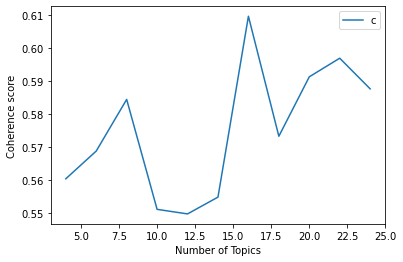

In [51]:
limit=25; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [52]:
lda_model =  gensim.models.LdaMulticore(bow, 
                                   num_topics = 16, 
                                   id2word = dictionary,                                    
                                   passes = 12,
                                   workers = 4)

In [53]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")    

Topic: 0 
Words: 0.034*"fan" + 0.026*"england" + 0.016*"team" + 0.016*"english" + 0.016*"im" + 0.014*"player" + 0.012*"football" + 0.012*"people" + 0.009*"think" + 0.008*"tournament"


Topic: 1 
Words: 0.047*"ticket" + 0.015*"2" + 0.012*"uefa" + 0.012*"1" + 0.010*"3" + 0.009*"ukraine" + 0.009*"game" + 0.009*"v" + 0.008*"anyone" + 0.008*"euro"


Topic: 2 
Words: 0.023*"0" + 0.022*"substitution" + 0.015*"match" + 0.009*"italy" + 0.008*"1" + 0.008*"scored" + 0.008*"spain" + 0.008*"yellow" + 0.007*"card" + 0.007*"goal"


Topic: 3 
Words: 0.019*"0" + 0.014*"substitution" + 0.013*"match" + 0.011*"england" + 0.008*"goal" + 0.008*"denmark" + 0.006*"1" + 0.006*"czech" + 0.006*"scored" + 0.006*"republic"


Topic: 4 
Words: 0.012*"like" + 0.011*"people" + 0.010*"petition" + 0.009*"italy" + 0.008*"im" + 0.007*"de" + 0.007*"many" + 0.007*"england" + 0.007*"yellow" + 0.007*"netherlands"


Topic: 5 
Words: 0.020*"euro" + 0.017*"2020" + 0.012*"lol" + 0.009*"cup" + 0.009*"power" + 0.009*"something" + 0

In [54]:
print('\nPerplexity: ', lda_model.log_perplexity(bow))


Perplexity:  -8.173749261917177


In [55]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_in_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6238792762577869
